In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("D:/junotbok/6th week/KNN_Data.txt", header=0, delimiter=',')
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
y = df['TARGET CLASS']
x = df.drop(columns=['TARGET CLASS'], axis=1)

In [4]:
x.shape

(1000, 10)

In [5]:
y.shape

(1000,)


Because the **KNN** classifier predicts the class of a given test observation
by identifying the observations that are nearest to it, the scale of the
variables matters. Any variables that are on a large scale will have a much
larger effect on the distance between the observations, and hence on the KNN
classifier, than variables that are on a small scale.

In [6]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1, algorithm='auto'))
])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [8]:
y_pred = pipe.predict(x_test)


In [9]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

Confusion Matrix:
[[134   8]
 [ 12 146]]


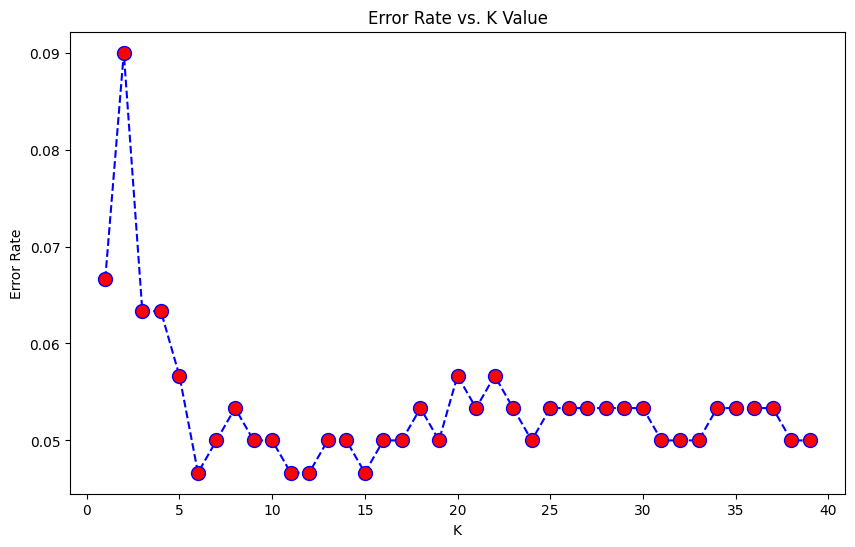

In [10]:
import matplotlib.pyplot as plt

# Calculate error rate for different values of K
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the error rate vs. K
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [11]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred_k1 = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred_k1))
print('\n')
print(classification_report(y_test, pred_k1))

WITH K=1


[[134   8]
 [ 12 146]]


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.92      0.94       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [12]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
pred_k23 = knn.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test, pred_k23))
print('\n')
print(classification_report(y_test, pred_k23))

WITH K=23


[[135   7]
 [  9 149]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

